## Assignment 2: 12 month panel plot of the climatology of ERA5 data

In [9]:
#import all necessary packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
from clim680_function import xyticks

In [10]:
# load in the data and all necessary variables
f= '/scratch/areed29/ERA5data/*.nc' #loads in Netcdf ERA5data
DS1 = xr.open_mfdataset(f) #opens the file
print(DS1)
data_lat= DS1.latitude.values #latitudes
data_lon= DS1.longitude.values #longitudes
nlats = len(data_lat[:])
nlons = len(data_lon[:])
time = DS1.time
#Extracts variables
total_cloud_cover = DS1.tcc
total_precip = DS1.tp
column_cloud_lw= DS1.tclw
total_column_wv = DS1.tcwv
ds_mean = DS1.mean(dim=('time','expver')) #this removes the expver variable in the dataset by averaging over that dimension
total_cloud_cover_1 = ds_mean.tcc.values #total cloud cover
total_precip_1= ds_mean.tp.values #total precipitation
column_cloud_lw_1 = ds_mean.tclw.values #total column cloud liquid water
total_column_watervapor = ds_mean.tcwv.values #total column cloud water vapor

<xarray.Dataset>
Dimensions:    (expver: 2, latitude: 401, longitude: 241, time: 513)
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-09-01
Data variables: (12/34)
    cbh        (time, expver, latitude, longitude) float32 dask.array<chunksize=(513, 2, 401, 241), meta=np.ndarray>
    cp         (time, expver, latitude, longitude) float32 dask.array<chunksize=(513, 2, 401, 241), meta=np.ndarray>
    crr        (time, expver, latitude, longitude) float32 dask.array<chunksize=(513, 2, 401, 241), meta=np.ndarray>
    hcc        (time, expver, latitude, longitude) float32 dask.array<chunksize=(513, 2, 401, 241), meta=np.ndarray>
    ilspf      (time, expver, latitude, longitude) float32 dask.array<chunksize=(513, 2, 401, 241), meta=np.ndarray>
    lsm        (time, ex

In [11]:
dataset =DS1.mean(dim='expver') # monthly averaged values of daily data on single levels
data_lat= DS1.latitude #latitudes
data_lon= DS1.longitude #longitudes
ds_climo = dataset.groupby('time.month').mean() #computes the climatology
print(ds_climo)

<xarray.Dataset>
Dimensions:    (latitude: 401, longitude: 241, month: 12)
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/34)
    cbh        (month, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    cp         (month, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    crr        (month, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    hcc        (month, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    ilspf      (month, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    lsm        (month, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    ...         ...
    p90.162    (month,

# Climatology panel plots
## Total Cloud Cover

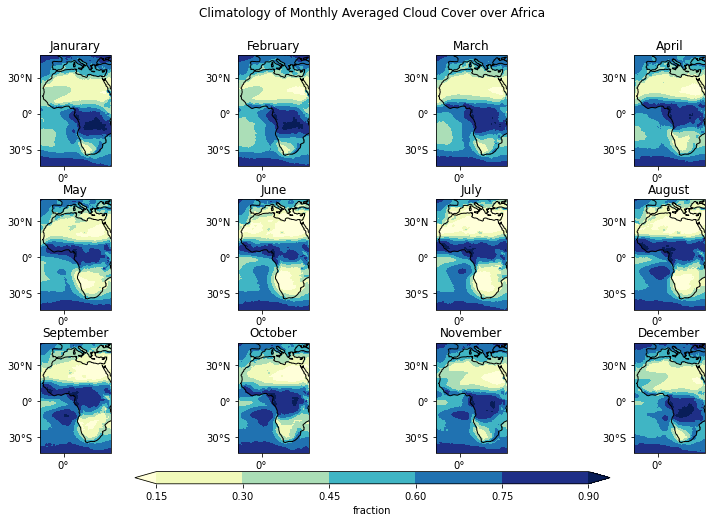

In [12]:
# Define the figure and each axis for the 3 rows and 4 columns
fig, axs = plt.subplots(nrows=3,ncols=4,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))
# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
month_list = ['Janurary','February','March','April','May','June','July','August','September','October','November','December']
axs=axs.flatten()
#Loop over all of the months and plot
for i,month in enumerate(ds_climo['month']):

        # Select the month
        data=ds_climo['tcc'].sel(month=month)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds_climo['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,ds_climo['latitude'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='YlGnBu',extend='both')

        # Longitude and latitude labels
        xyticks(axs[i],lons,ds_climo['latitude'])
        # Title each subplot with the name of the month
        axs[i].set_title(month_list[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
        axs[i].set_extent([-20, 40, -40, 45])
# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.0, right=1,
                    wspace=0.0, hspace=0.3) #0.1, 0.5
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar = fig.colorbar(cs, cax = cbar_ax, orientation = 'horizontal', label= 'fraction', pad = 0.05)
# Add a big title at the top
plt.suptitle('Climatology of Monthly Averaged Cloud Cover over Africa')
plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/12panelclimo_clouds')

## Total Precipitation

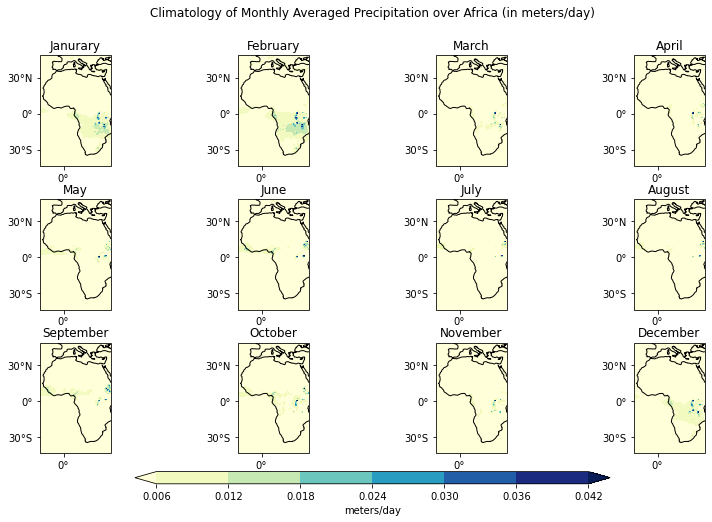

In [13]:
# Define the figure and each axis for the 3 rows and 4 columns
fig, axs = plt.subplots(nrows=3,ncols=4,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
month_list = ['Janurary','February','March','April','May','June','July','August','September','October','November','December']
axs=axs.flatten()
#Loop over all of the months and plot
for i,month in enumerate(ds_climo['month']):

        # Select the month
        data=ds_climo['tp'].sel(month=month)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds_climo['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,ds_climo['latitude'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='YlGnBu',extend='both')

        # Longitude and latitude labels
        xyticks(axs[i],lons,ds_climo['latitude'])
        # Title each subplot with the name of the month
        axs[i].set_title(month_list[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
        axs[i].set_extent([-20, 40, -40, 45])
# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.0, right=1,
                    wspace=0.0, hspace=0.3) #0.1, 0.5
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar = fig.colorbar(cs, cax = cbar_ax, orientation = 'horizontal', label= 'meters/day', pad = 0.05)
# Add a big title at the top
plt.suptitle('Climatology of Monthly Averaged Precipitation over Africa (in meters/day)')
plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/12panelclimo_precip')

## Total Column Water Vapor (Precipitable Water)

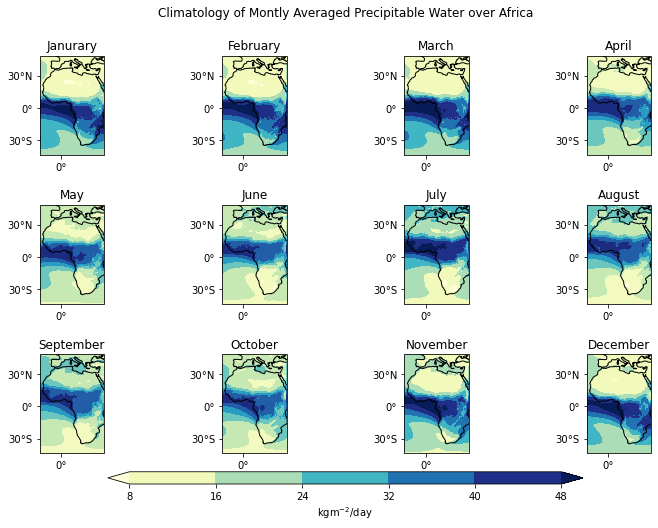

In [14]:
# Define the figure and each axis for the 3 rows and 4 columns
fig, axs = plt.subplots(nrows=3,ncols=4,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()
month_list = ['Janurary','February','March','April','May','June','July','August','September','October','November','December']
#Loop over all of the months and plot
for i,month in enumerate(ds_climo['month']):

        # Select the month
        data=ds_climo['tcwv'].sel(month=month)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds_climo['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,ds_climo['latitude'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='YlGnBu',extend='both')

        # Longitude labels and latitude labels

        xyticks(axs[i],lons,ds_climo['latitude'])
        # Title each subplot with the name of the month
        axs[i].set_title(month_list[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
        axs[i].set_extent([-20, 40, -40, 45])        
# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
label_string = ('kg$\mathregular{m^{-2}}$/day')
# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label= label_string)
# Add a big title at the top
plt.suptitle('Climatology of Montly Averaged Precipitable Water over Africa')
plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/12panelclimo_tcwv')